# 데이터와 통계학

- 대상을 관찰하고 측정함으로써, 그 대상의 정보, 즉 '데이터'를 얻을 수 있습니다. 
- 데이터는 수치의 모음으로(문자로 이루어진 데이터도 물론 있음), 막연히 바라보기만 해서 무엇인지 제대로 알 수 없습니다.
- 데이터 분석의 근간이 되는 통계학은 '확률론'이라는 수학을 이용합니다.

# 데이터 분석의 목적

- '데이터의 분석은 목적은 무엇인가?'
- 1. 데이터를 요약하는 것
- 2. 대상을 설명하는 것
- 3. 새로 얻을 데이터를 예측하는 것

## 목적1 데이터 요약 

- raw data는 수치의 나열일 뿐, 바라보기만 해서는 경향을 파악할 수 없습니다.
- 따라서 데이터를 요약하고 정리할 방법이 필요하다.
- 예를 들어, 평균값 계산, 분포 파악 등

## 목적2 대상 설명 

- "대상이가진 성질과 관계성을 명확히 밝히고 이를 이해한다." 
- 통계학에 의거한 데이터 분석은, 데이터를 정량적이고 객관적으로 평가하여 대상이 가진 성질과 관계성을 올바르게 찾고자 하는 시도 입니다.
- raw data를 단순하게 봤을 때, 어떤 경향과 특성이 있는지 데이터의 특성을 파악하는 것이 힘듭니다. 
- 이를 통계학을 바탕으로 데이터 분석을 진행했을 때, 비로소 객관적인 증거를 만들 수 있습니다.

### 설명에는 수준이 있다! 

- 설명(또는 이해)에는 수준이 있습니다. 
- 인과관계, 상관관계는 엄연히 다릅니다. 

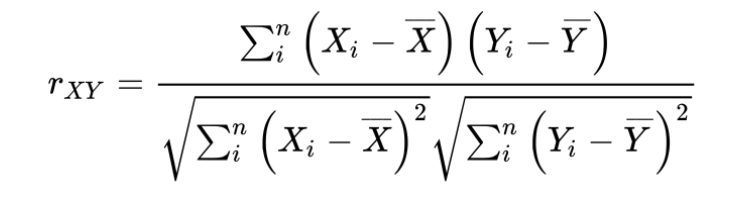

In [1]:
# 상관관계 구현하기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


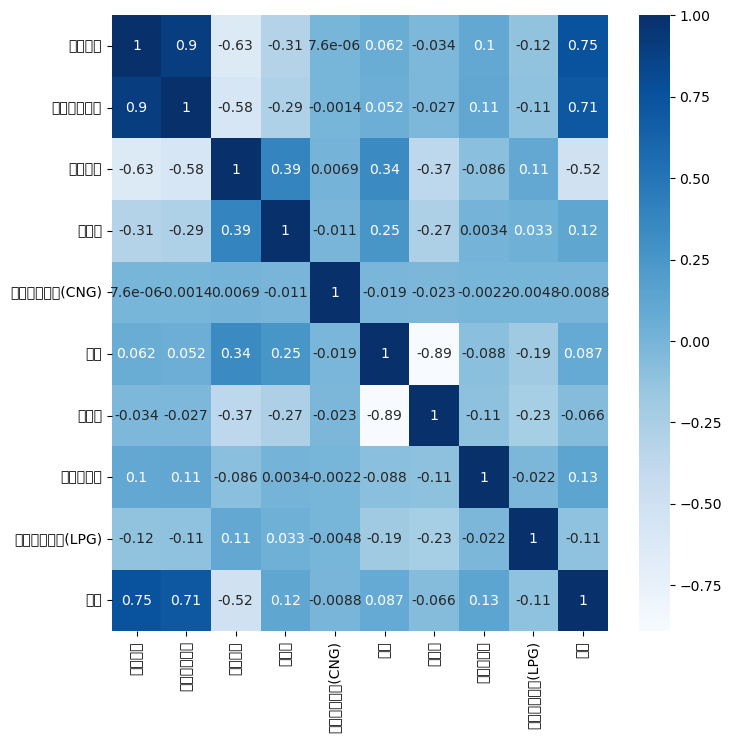

In [2]:
# 히트맵으로 상관계수 파악하기 

plt.figure(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

In [5]:
# 평균 함수 구현
# 제곱근 함수 구현
# pearson 상관계수 함수 구현 

def mean(inp):
    result = 0
    len_inp = len(inp)    
    for i in inp:
        result += i
    result = result / len_inp
    return result

def sqrt(inp):
    result = inp/2
    for i in range(30):
        result = (result + (inp / result)) / 2
    return result


def cor(inp1, inp2):
    # 평균 먼저 계산
    mean_inp1 = mean(inp1)
    mean_inp2 = mean(inp2)
    # 분자
    son = 0
    for i in range(len(inp1)):
        son += (inp1[i] - mean_inp1) * (inp2[i] - mean_inp2)
    # 분모
    x_mom = 0
    for i in range(len(inp1)):
        x_mom += (inp1[i] - mean_inp1) ** 2
    y_mom = 0
    for i in range(len(inp2)):
        y_mom += (inp2[i] - mean_inp2) ** 2
    mom = sqrt(x_mom) * sqrt(y_mom)
    result = son / mom
    return result

# 상관계수 계산
data1 = train['주행거리']
data2 = train['가격']
print(cor(data1, data2))

-0.5193353412806029


#### 인과관계
- 인과관계란 2가지 중 하나(원인)를 변화시키면, 다른 하나(결과)도 바꿀 수 있는 관계를 말합니다.
- 인과관계를 알면 곧 원리(매커니즘)에 관한 지식을 얻는 것이기에 깊은 이해라고 할 수 있습니다. 
- 더욱이 인과관계를 알면 좋은 점은 원인을 바꿈으로써 원하는 결과를 얻을 수 있다는 것입니다.
- 이때 원인을 바꾸는 것을 '개입'이라 합니다.


#### 상관관계

- 상관관계란 한쪽이 크면 다른 한쪽도 큰(또는 한쪽이 크면 다른 한쪽은 작은)관계를 말합니다.
- 상관관계에서는 어떠한 가능성을 구별하는 것이 어렵기 때문에 해석에 있어서 주의해야 합니다. 
- 단, 상관관계가 있다는 설명할 raw data의 데이터 예측이 가능해집니다. 

## 미지의 데이터 예측

- 미지의 데이터 예측이란 이미 얻은 데이터를 기반으로, 이후 새롭게 얻을 데이터를 예측하는 것을 말합니다. 
- 즉, 예측이 들어맞기 쉬운 관계성을 발견할 수 있게 됩니다.
- 한편, 선형관계 말고 해석이 어려운 복잡한 관계를 추출하고 예측하는 기계학습이라는 방법도 있습니다. 

# 통계학의 역할
## 통계학은 데이터의 퍼짐 정도가 클수록 힘을 발휘한다

- 데이터 분석에서 통계학의 중요한 역할은, 퍼짐(산포, dispersion)이 있는 데이터에 대해 설명이나 예측을 하는 것 입니다.
- 여기서 말하는 '퍼짐'이란, 데이터에 포함된 값 하나하나의 차이를 가리킵니다. 
- 데이터의 퍼짐은 대상이 가진 성질이나 관계성의 본모습을 감추고, 정확하게 파악할 수 없도록 합니다.
- 통계학은 이러한 데이터 퍼짐을 '불확실성'이라 평가하고, 통계학의 목적인 '대상의 설명과 예측'을 수행합니다.

## 확률을 사용하자

- 통계학은 데이터의 퍼짐이나 불확실성에 대처하는 방법을 제공합니다.
- 그 근거가 되는 것이 데이터 퍼짐이나 불확실성을 확률로 나타내는 확률론 입니다.

## 데이터 퍼짐이 적은 현상

- 물리 현상인 물체의 운동, 운동을 지배하는 운동 방정식 등

# 통계학의 전체 모습
## 기술통계와 추론통계

- 수집하는 데이터를 정리하고 요약하는 방법을, 기술통계(descriptive statistics)라 합니다.
- 이를 통해 데이터 그 자체의 특성이나 경향을 알 수 있습니다.
- 기술통계에서는 확보한 데이터에만 집중하면서, 데이터 자체의 성질을 이해하는 것을 목표로 합니다.

---------------------------------------------------------------------------------------------------

- 이와 달리, 수집한 데이터로부터 데이터의 발생원을 추정하는 방법을, 추론통계라 합니다.
- 추론통계는 통계학에서 가장 중요한 위치를 차지한다고 해도 과언이 아닙니다. 

### 확률 모형(중요)

- 데이터가 발생한 대상의 성질을 추정할 때는 다음과 같이 생각합니다.
- 데이터는 대상을 관찰함으로써 얻습니다만, 이 대상의 성질 자체는 직접 관찰할 수 없으며 다루기도 어렵습니다.

----------------------------------------------------------------------------------------------------------

구체적인 예로 현실의 주사위는 물리 법칙을 따르며, 때문에 미세한 움직임의 차이가 어떤 눈이 나올 지 불확실하게 만듭니다. 주사위를 던지는 손의 움직임부터 공기의 흐름까지, 전부 자세히 관측하고 어떤 눈이 나올지 기술하는 것은 무척 어려운 일 입니다. 이에 우리는 보통 확률을 이용하여 주사위를 각 눈이 1/6 확률로 나타나는 확률 모형으로 표현하고 있습니다. 

## 통계적 추론과 가설검정(데이터분석의 근본)

- 추론통계에는 크게 두 가지가 있습니다.
- 1. 데이터에서 가정한 확률 모형의 성질을 추정하는 방법인 통계적 추론(statistcal inference)입니다.
- 2. 세운 가설과 얻은 데이터가 얼마나 들어맞는지를 평가하여, 가설을 채택할 것인가를 판단하는 방법인 가설검정(statistical test)입니다.

In [7]:
# train data 분석하기

# head()메서드로 데이터 위에서 5줄 출력
train.head()

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55


In [9]:
# train.info 파악하기

# 데이터의 전체 양상 파악하기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [10]:
# 기술통계량을 확인하는 코드입니다.

train.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [13]:
# 왜곡정도 파악
# skew() 왜곡정도 파악하기


train.skew()

생산년도           -0.248113
모델출시년도         -0.236330
주행거리            0.587413
배기량             2.320969
압축천연가스(CNG)    45.449740
경유              0.302441
가솔린            -0.071871
하이브리드           9.705487
액화석유가스(LPG)     4.332973
가격              0.908303
dtype: float64